In [1]:
from penis_detect import detecting_shit as ds
import cv2
import random
%matplotlib inline 
from matplotlib import pyplot as plt
import time 
import csv
import tqdm
import numpy as np

In [2]:
# this is probably reinventing the wheel but im too lazy
def draw_bboxes(img, input_json):
    for anno in input_json['shapes']:
        ptsarr = anno['points']
        color = (random.randint(0,255), random.randint(0,255), 128)
        plotted = cv2.rectangle(img, (int(ptsarr[0][0]),int(ptsarr[0][1])),(int(ptsarr[1][0]),int(ptsarr[1][1])) , color, 1)
        img = plotted
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img, interpolation='nearest')
    plt.show()

In [3]:
MODEL_PATH = "C:\\auto_label\\detect-models\\28Detv1.131_320x320.pt"
MODEL_PATH_FULL = "C:\\auto_label\\detect-models\\28Detv1.12.pt"
DEVICE = int("0")
CONFIDENCE = 0.5
SZ = (320,320)
SZFULL = (640,640)
IMAGE_PATH = "C:\\Users\\hbwindows\\Downloads\\28_dataset-20230911T095703Z-001\\28_dataset\\fullImage-1683002043222.jpeg"
def get_single_det(img, size, model, showimg=False):
    t1 = time.time()
    result = ds.ClassifyShit(IMAGE_PATH).detect_from_model(model, DEVICE, CONFIDENCE, size)
    t2 = time.time() - t1
    if showimg:
        pic = draw_bboxes(cv2.imread(IMAGE_PATH) ,result)
    return result, t2 


100%|█████████████████████████████| 50/50 [01:18<00:00,  1.56s/it]


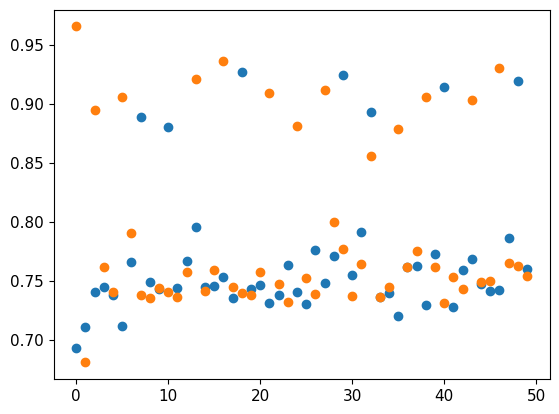

In [16]:
# benchmark model
x320 = []
x640 = []

with open("_temp_comp.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerow([320,640])
    for i in tqdm.tqdm(range(0,50)):
        _b, i640 = get_single_det(IMAGE_PATH, SZFULL, MODEL_PATH_FULL)
        _a, i320 = get_single_det(IMAGE_PATH, SZ, MODEL_PATH)
        x320.append(i320)
        x640.append(i640)
        comp = list([float(i320),float(i640)])
        writer.writerow(comp)

plt.scatter(np.arange(0, len(x320), 1), x320)
plt.scatter(np.arange(0, len(x640), 1), x640 )
plt.show()
